Hoang Anh Nguyen

# Excercise 1

In [1]:
import numpy as np

# Input data
Wp = np.array([[10], [20], [30], [1]])   

K = np.array([
    [2, 0, 10],
    [0, 2, 20],
    [0, 0, 1]
])

C_T_W = np.array([
    [0,  1, 0, -1],
    [-1, 0, 0,  2],
    [0,  0, 1,  0],
    [0,  0, 0,  1]
])

R = C_T_W[:3, :3]
t = C_T_W[:3, 3].reshape(3, 1)

# Camera matrix P = K [R | t]
P = K @ np.hstack((R, t))

# Project world point
x_tilde = P @ Wp

# Normalize to get image coordinates (u, v)
u = x_tilde[0, 0] / x_tilde[2, 0]
v = x_tilde[1, 0] / x_tilde[2, 0]

# Integer pixel coordinates (rounded)
u_pix, v_pix = round(u), round(v)

print("1. Camera matrix P:\n", P)
print("\n2. Projected homogeneous coordinates x_tilde:\n", x_tilde)
print(f"\n3. Image coordinates (u, v) = ({u:.3f}, {v:.3f})")
print(f"Integer pixel coordinates = ({u_pix}, {v_pix})")


1. Camera matrix P:
 [[ 0  2 10 -2]
 [-2  0 20  4]
 [ 0  0  1  0]]

2. Projected homogeneous coordinates x_tilde:
 [[338]
 [584]
 [ 30]]

3. Image coordinates (u, v) = (11.267, 19.467)
Integer pixel coordinates = (11, 19)


# Excercise 2

In [2]:
import numpy as np
import cv2 as cv
import glob
import yaml
import matplotlib.pyplot as plt
import os

1. Camera I used: Iphone 12, then pictures were resized by:

In [3]:
input_folder = "data/"
output_folder = "data_resized/"
os.makedirs(output_folder, exist_ok=True)

max_dim = 500  # max width or height

for f in glob.glob(input_folder + "*.jpg"):
    img = cv.imread(f)
    h, w = img.shape[:2]
    scale = max_dim / max(h, w)
    new_size = (int(w*scale), int(h*scale))
    resized = cv.resize(img, new_size, interpolation=cv.INTER_AREA)
    
    cv.imwrite(os.path.join(output_folder, os.path.basename(f)), resized)

2.  
   - size of the caliration board: 5, 7
   
   - size of each square: 30.0 mm

In [4]:
# termination criteria; CHANGE the second number to size of each square
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# define checkerboard dimensions
CHECKERBOARD = (5, 7)  # number of inner corners per row and column;  ADJUST based on checkerboard's number of INNER squares
square_size = 30.0  # mm per square; CHANGE to your square side length

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((CHECKERBOARD[0]*CHECKERBOARD[1],3), np.float32) # adjust based on checkerboard's number of INNER squares
objp[:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1,2) * square_size

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

3. \#pictures: 7
4. Show calibration outputs, including images, intrinsic
matrix, and distortion parameters

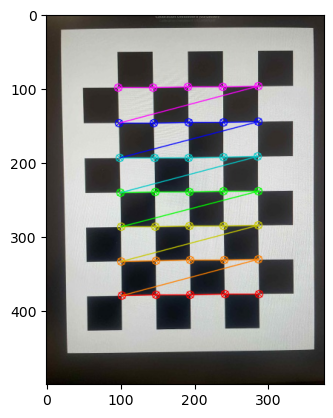

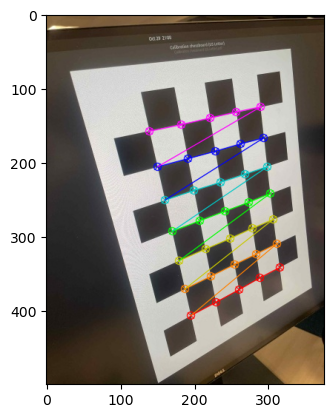

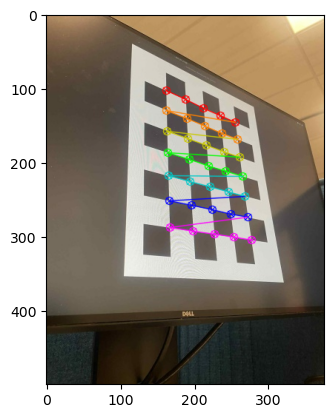

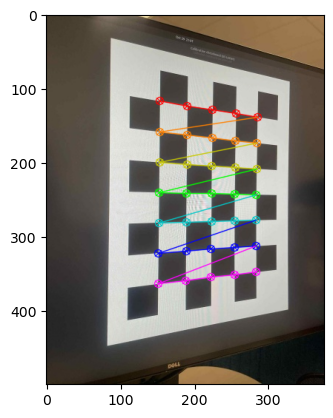

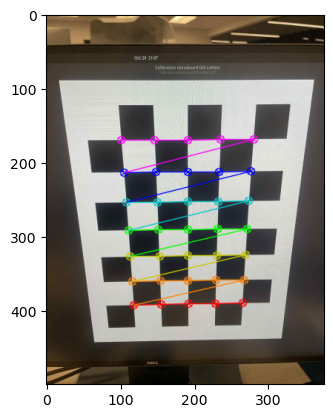

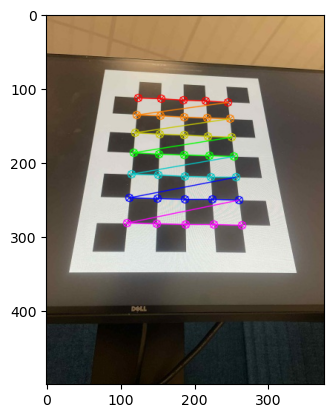

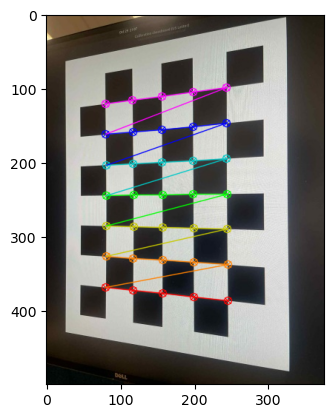

Number of images used for calibration:  7


In [5]:
images = glob.glob(r'data_resized/*.jpg')

counter = 0
for fname in images:  
    img = cv.imread(fname) # Capture frame-by-frame
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (CHECKERBOARD[0],CHECKERBOARD[1]), None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)  

        corners2 = cv.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        counter += 1
        img = cv.drawChessboardCorners(img, (CHECKERBOARD[0],CHECKERBOARD[1]), corners2, ret)
        
        # cv.imshow('img', img)
        # cv.waitKey(1000)
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.show()


print("Number of images used for calibration: ", counter)

cv.destroyAllWindows()


In [6]:
# calibration
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

print("\nIntrinsic Matrix (K):")
print(mtx)

print("\nDistortion Parameters:")
print(dist)

# transform the matrix and distortion coefficients to writable lists
data = {'camera_matrix': np.asarray(mtx).tolist(),
        'dist_coeff': np.asarray(dist).tolist()}

# save it to a yaml file
with open("calibration_matrix.yaml", "w") as f:
    yaml.dump(data, f)


Intrinsic Matrix (K):
[[382.8726146    0.         190.76846406]
 [  0.         382.64118857 248.90731514]
 [  0.           0.           1.        ]]

Distortion Parameters:
[[ 0.17864531 -0.54388979 -0.00059731  0.00189418  0.42814637]]


5. Radial distortion parameters \& Tangential distortion parameters:

In [7]:
k1, k2, p1, p2, k3 = dist.ravel()[:5]
print("Radial Distortion (k1,k2,k3):", [k1, k2, k3])
print("Tangential Distortion (p1,p2):", [p1, p2])


Radial Distortion (k1,k2,k3): [0.17864530889074567, -0.5438897866020638, 0.4281463665784065]
Tangential Distortion (p1,p2): [-0.0005973143781416666, 0.0018941807210840311]
